In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
import os

drive.mount("/content/drive", force_remount=True)

# Make sure to replace 'MyDrive/path/to/your/file.txt' with the actual path
file_path = '/content/drive/MyDrive/Colab Notebooks/MSDS 422/Module 1/bangladesh_data.csv'


Mounted at /content/drive


### 1. EDA on Bangladesh's Socio-economic data

In [ ]:
# Load dataset
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()  # Clean column names

# Display basic information
print("Dataset Shape:", data.shape)

print("\nBasic Info:")
data.info()

print("\nSummary Statistics:")
print(data.describe())

print("\nFirst Few Rows:")
print(data.head())

print("\nMissing Values:")
print(data.isnull().sum())

Dataset Shape: (44, 118)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Columns: 118 entries, Year to Percent
dtypes: float64(25), int64(1), object(92)
memory usage: 40.7+ KB

Summary Statistics:
              Year  Literacy Rate(%)  Net Migration Rate  GNI (Billion USD)  \
count    44.000000         44.000000           43.000000          44.000000   
mean   2001.500000         48.115455           -2.162070         120.265000   
std      12.845233         16.600579            1.028741         133.834785   
min    1980.000000         26.000000           -4.542000          18.480000   
25%    1990.750000         33.125000           -2.721500          33.437500   
50%    2001.500000         48.750000           -2.113000          57.450000   
75%    2012.250000         59.325000           -1.338500         149.825000   
max    2023.000000         76.800000           -0.452000         493.930000   

       Number of Private Vehichles  Death Rate  Life Exp

In [ ]:
# Columns of interest for analysis
columns_of_interest = [
                    "Year",
                    "Poverty Rate (National)",
                    "Rural Poverty Rate",
                    "Urban Poverty Rate",
                    "Literacy Rate(%)",
                    "GDP",
                    "Education Spending (% of GDP)",
                    "Healthcare Spending  Per Capita (US$)",
                    "Population",
                    "Urban Population % of Total",
                    "Unemployment Rate (%)",
                    "Inflation Rate (%)",
                    "Net Migration Rate",
                    "GDP Per Capita",
                    "Export Growth(%GDP)",
                    "Import Growth(%GDP)",
                    "Death Rate",
                    "Birth Rate",
                    "Infant Mortality Rate",
                    "Life Expectancy Growth Rate (%)",
                    "Annual % Crime Rate Change",
                    "green house gas emissions Annual % Change",
                    "Fossil Fuel consumption % of Total Energy Use",
                    "Maternal Mortality Rate Per 100K Live Births",
                    "Clean Water Access % of Population",
                    "Electricity Access % of Population",
                    "Suicide Rate"
]

In [ ]:
len(columns_of_interest)

27

In [ ]:
# calculate missing value % for each feature
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage.sort_values())

Year                                             0.000000
Infant Mortality Rate                            0.000000
Growth Rate.2                                    0.000000
Unemployment Rate (%)                            0.000000
Annual Change (%).1                              0.000000
                                                  ...    
tourism exports                                 63.636364
Tourism spending                                63.636364
Annual Change.4                                 75.000000
Coal consumption % of Electricity from Coal     75.000000
Number of Private Vehichles                    100.000000
Length: 118, dtype: float64


#### 1.1 Preping Bangladesh's Socio-economic data and Feature Engineering data for further analysis

In [ ]:
# Check if columns exist in the dataset
missing_columns = [col for col in columns_of_interest if col not in data.columns]
if missing_columns:
    print(f"\nColumns not found in the dataset: {missing_columns}")
else:
    # Subset and copy relevant data
    data_subset = data[columns_of_interest].copy()
    print("\nData Subset:")
    print(data_subset.head())

    # Clean and preprocess data
    # Handle percentage columns
    percentage_columns = ["Poverty Rate (National)", "Rural Poverty Rate", "Urban Poverty Rate", "Literacy Rate(%)", "Education Spending (% of GDP)",
                          "Unemployment Rate (%)",
                    "Inflation Rate (%)",
                    "Net Migration Rate",
                    "Export Growth(%GDP)",
                    "Import Growth(%GDP)",
                    "Death Rate",
                    "Birth Rate",
                    "Infant Mortality Rate",
                    "Life Expectancy Growth Rate (%)",
                    "Annual % Crime Rate Change",
                    "green house gas emissions Annual % Change",
                    "Fossil Fuel consumption % of Total Energy Use",
                    "Maternal Mortality Rate Per 100K Live Births",
                    "Clean Water Access % of Population",
                    "Electricity Access % of Population",
                    "Suicide Rate"]
    for col in percentage_columns:
        if data_subset[col].dtype == 'object':
            data_subset[col] = data_subset[col].str.rstrip('%').astype('float') / 100.0

    # Clean GDP column
    if data_subset["GDP"].dtype == 'object':
        data_subset["GDP"] = data_subset["GDP"].replace('[\$,B]', '', regex=True).astype('float')
    if data_subset["GDP Per Capita"].dtype == 'object':
      data_subset["GDP Per Capita"] = data_subset["GDP Per Capita"].replace('[\$,B]', '', regex=True).astype('float')

    # Clean Healthcare Spending column
    if data_subset["Healthcare Spending  Per Capita (US$)"].dtype == 'object':
        data_subset["Healthcare Spending  Per Capita (US$)"] = data_subset["Healthcare Spending  Per Capita (US$)"].replace('[\$,]', '', regex=True).astype('float')

    # Clean Population column
    if data_subset["Population"].dtype == 'object':
        data_subset["Population"] = data_subset["Population"].replace('[,]', '', regex=True).astype('float')

    # Rename columns for consistency
    data_subset.columns = [
        "Year", "National Poverty Rate", "Rural Poverty Rate", "Urban Poverty Rate",
        "Literacy Rate", "GDP", "Education Spending", "Healthcare Spending",
        "Population", "Urban Population (%)",
        "Unemployment Rate",
        "Inflation Rate",
        "Net Migration Rate",
        "GDP Per Capita",
        "Export Growth",
        "Import Growth",
        "Death Rate",
        "Birth Rate",
        "Infant Mortality Rate",
        "Life Expectancy Growth Rate",
        "Annual Crime Rate Change",
        "Greenhouse Gas Emissions Change",
        "Fossil Fuel Consumption",
        "Maternal Mortality Rate",
        "Clean Water Access",
        "Electricity Access",
        "Suicide Rate"
    ]

    # Impute missing values
    imputer = SimpleImputer(strategy="mean")
    data_subset.iloc[:, 1:] = imputer.fit_transform(data_subset.iloc[:, 1:])

    # Feature Scaling
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_subset.iloc[:, 1:])
    scaled_data = pd.DataFrame(scaled_data, columns=data_subset.columns[1:])
    data_subset = pd.concat([data_subset["Year"], scaled_data], axis=1)

    # Feature Engineering
    data_subset["Urbanization × GDP Growth"] = data_subset["Urban Population (%)"] * data_subset["GDP"]
    data_subset["3-Year GDP Rolling Avg"] = data_subset["GDP"].rolling(window=3).mean()
    data_subset["3-Year Literacy Rolling Avg"] = data_subset["Literacy Rate"].rolling(window=3).mean()


Data Subset:
   Year Poverty Rate (National) Rural Poverty Rate Urban Poverty Rate  \
0  1980                  58.80%             60.70%             47.90%   
1  1981                  56.60%             59.00%             44.50%   
2  1982                  54.30%             56.80%             42.30%   
3  1983                  52.40%             55.30%             39.80%   
4  1984                  51.60%             54.00%             39.10%   

   Literacy Rate(%)      GDP Education Spending (% of GDP)  \
0              26.0  $18.14B                         5.26%   
1              27.0  $20.25B                         6.63%   
2              27.8  $18.53B                         6.39%   
3              28.2  $17.61B                         6.47%   
4              28.8  $18.92B                         8.09%   

  Healthcare Spending  Per Capita (US$)  Population  \
0                                   NaN  83,929,765   
1                                   NaN  86,154,836   
2        

In [ ]:
# do the same data processing but keep original values without scaling

# Check if columns exist in the dataset
missing_columns = [col for col in columns_of_interest if col not in data.columns]
if missing_columns:
    print(f"\nColumns not found in the dataset: {missing_columns}")
else:
    # Subset and copy relevant data
    data_original = data[columns_of_interest].copy()
    print("\nData Subset:")
    print(data_original.head())

    # Clean and preprocess data
    # Handle percentage columns
    percentage_columns = ["Poverty Rate (National)", "Rural Poverty Rate", "Urban Poverty Rate", "Literacy Rate(%)", "Education Spending (% of GDP)",
                          "Unemployment Rate (%)",
                    "Inflation Rate (%)",
                    "Net Migration Rate",
                    "Export Growth(%GDP)",
                    "Import Growth(%GDP)",
                    "Death Rate",
                    "Birth Rate",
                    "Infant Mortality Rate",
                    "Life Expectancy Growth Rate (%)",
                    "Annual % Crime Rate Change",
                    "green house gas emissions Annual % Change",
                    "Fossil Fuel consumption % of Total Energy Use",
                    "Maternal Mortality Rate Per 100K Live Births",
                    "Clean Water Access % of Population",
                    "Electricity Access % of Population",
                    "Suicide Rate"]
    for col in percentage_columns:
        if data_original[col].dtype == 'object':
            data_original[col] = data_original[col].str.rstrip('%').astype('float') / 100.0

    # Clean GDP column
    if data_original["GDP"].dtype == 'object':
        data_original["GDP"] = data_original["GDP"].replace('[\$,B]', '', regex=True).astype('float')
    if data_original["GDP Per Capita"].dtype == 'object':
      data_original["GDP Per Capita"] = data_original["GDP Per Capita"].replace('[\$,B]', '', regex=True).astype('float')

    # Clean Healthcare Spending column
    if data_original["Healthcare Spending  Per Capita (US$)"].dtype == 'object':
        data_original["Healthcare Spending  Per Capita (US$)"] = data_original["Healthcare Spending  Per Capita (US$)"].replace('[\$,]', '', regex=True).astype('float')

    # Clean Population column
    if data_original["Population"].dtype == 'object':
        data_original["Population"] = data_original["Population"].replace('[,]', '', regex=True).astype('float')

    # Rename columns for consistency
    data_original.columns = [
        "Year", "National Poverty Rate", "Rural Poverty Rate", "Urban Poverty Rate",
        "Literacy Rate", "GDP", "Education Spending", "Healthcare Spending",
        "Population", "Urban Population (%)",
        "Unemployment Rate",
        "Inflation Rate",
        "Net Migration Rate",
        "GDP Per Capita",
        "Export Growth",
        "Import Growth",
        "Death Rate",
        "Birth Rate",
        "Infant Mortality Rate",
        "Life Expectancy Growth Rate",
        "Annual Crime Rate Change",
        "Greenhouse Gas Emissions Change",
        "Fossil Fuel Consumption",
        "Maternal Mortality Rate",
        "Clean Water Access",
        "Electricity Access",
        "Suicide Rate"
    ]

    # Impute missing values
    imputer = SimpleImputer(strategy="mean")
    data_original.iloc[:, 1:] = imputer.fit_transform(data_original.iloc[:, 1:])

    # Feature Engineering
    data_original["Urbanization × GDP Growth"] = data_original["Urban Population (%)"] * data_original["GDP"]
    data_original["3-Year GDP Rolling Avg"] = data_original["GDP"].rolling(window=3).mean()
    data_original["3-Year Literacy Rolling Avg"] = data_original["Literacy Rate"].rolling(window=3).mean()


Data Subset:
   Year Poverty Rate (National) Rural Poverty Rate Urban Poverty Rate  \
0  1980                  58.80%             60.70%             47.90%   
1  1981                  56.60%             59.00%             44.50%   
2  1982                  54.30%             56.80%             42.30%   
3  1983                  52.40%             55.30%             39.80%   
4  1984                  51.60%             54.00%             39.10%   

   Literacy Rate(%)      GDP Education Spending (% of GDP)  \
0              26.0  $18.14B                         5.26%   
1              27.0  $20.25B                         6.63%   
2              27.8  $18.53B                         6.39%   
3              28.2  $17.61B                         6.47%   
4              28.8  $18.92B                         8.09%   

  Healthcare Spending  Per Capita (US$)  Population  \
0                                   NaN  83,929,765   
1                                   NaN  86,154,836   
2        

In [ ]:
print(data_subset.shape)
print(data_original.shape)

(44, 30)
(44, 30)


In [ ]:
# create a subset of data with columns_of_interest
data_original_2 = data[columns_of_interest]

# calculate missing value % for each feature
missing_percentage = (data_original_2.isnull().sum() / len(data_original_2)) * 100
print(missing_percentage)

Year                                              0.000000
Poverty Rate (National)                           0.000000
Rural Poverty Rate                                0.000000
Urban Poverty Rate                                0.000000
Literacy Rate(%)                                  0.000000
GDP                                               0.000000
Education Spending (% of GDP)                    18.181818
Healthcare Spending  Per Capita (US$)            50.000000
Population                                        0.000000
Urban Population % of Total                       0.000000
Unemployment Rate (%)                             0.000000
Inflation Rate (%)                                0.000000
Net Migration Rate                                2.272727
GDP Per Capita                                    0.000000
Export Growth(%GDP)                               0.000000
Import Growth(%GDP)                               0.000000
Death Rate                                        0.0000

In [ ]:
# calculate missing value % for each feature from imputed dataset
missing_percentage = (data_original.isnull().sum() / len(data_original)) * 100
print(missing_percentage)

Year                               0.000000
National Poverty Rate              0.000000
Rural Poverty Rate                 0.000000
Urban Poverty Rate                 0.000000
Literacy Rate                      0.000000
GDP                                0.000000
Education Spending                 0.000000
Healthcare Spending                0.000000
Population                         0.000000
Urban Population (%)               0.000000
Unemployment Rate                  0.000000
Inflation Rate                     0.000000
Net Migration Rate                 0.000000
GDP Per Capita                     0.000000
Export Growth                      0.000000
Import Growth                      0.000000
Death Rate                         0.000000
Birth Rate                         0.000000
Infant Mortality Rate              0.000000
Life Expectancy Growth Rate        0.000000
Annual Crime Rate Change           0.000000
Greenhouse Gas Emissions Change    0.000000
Fossil Fuel Consumption         

In [ ]:
data_original['Healthcare Spending'].value_counts()

,count
Healthcare Spending,
25.545455,22
12.000000,2
9.000000,2
27.000000,1
51.000000,1
48.000000,1
45.000000,1
42.000000,1
40.000000,1


#### 1.2 Correlation Analysis on Features for data relations

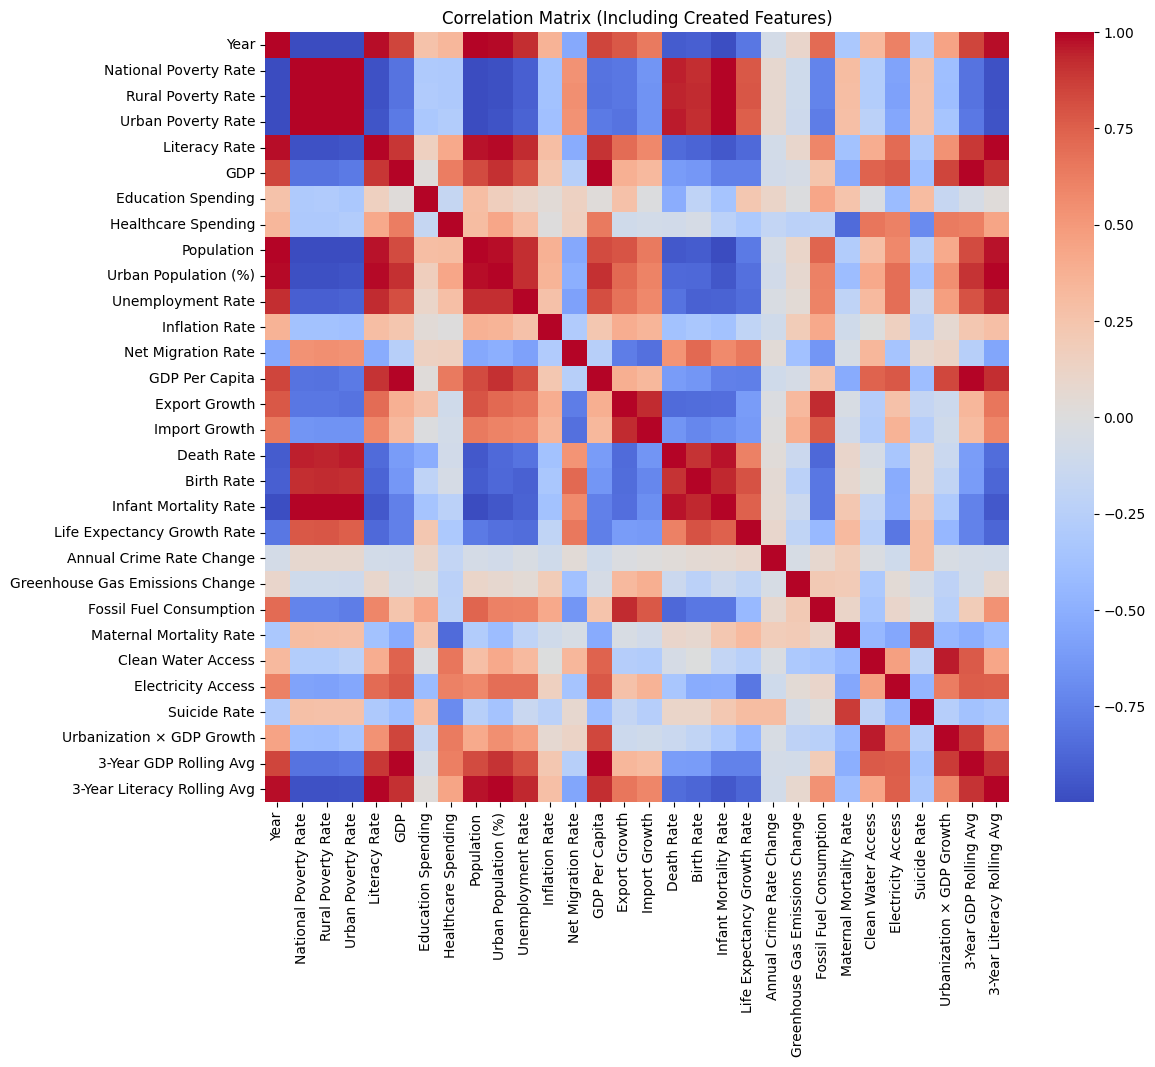

In [ ]:
    # Exploratory Data Analysis
    # Correlation Matrix
    correlation_matrix = data_subset.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix (Including Created Features)")
    plt.show()

In [ ]:
# check correlation with National Poverty Rate
correlation_matrix["National Poverty Rate"].sort_values(ascending=False)

,National Poverty Rate
National Poverty Rate,1.000000
Rural Poverty Rate,0.999709
Urban Poverty Rate,0.998054
Infant Mortality Rate,0.992928
Death Rate,0.947170
Birth Rate,0.917431
Life Expectancy Growth Rate,0.775513
Net Migration Rate,0.535455
Maternal Mortality Rate,0.302007
Suicide Rate,0.276712


#### 1.3 Feature trend graph analysis

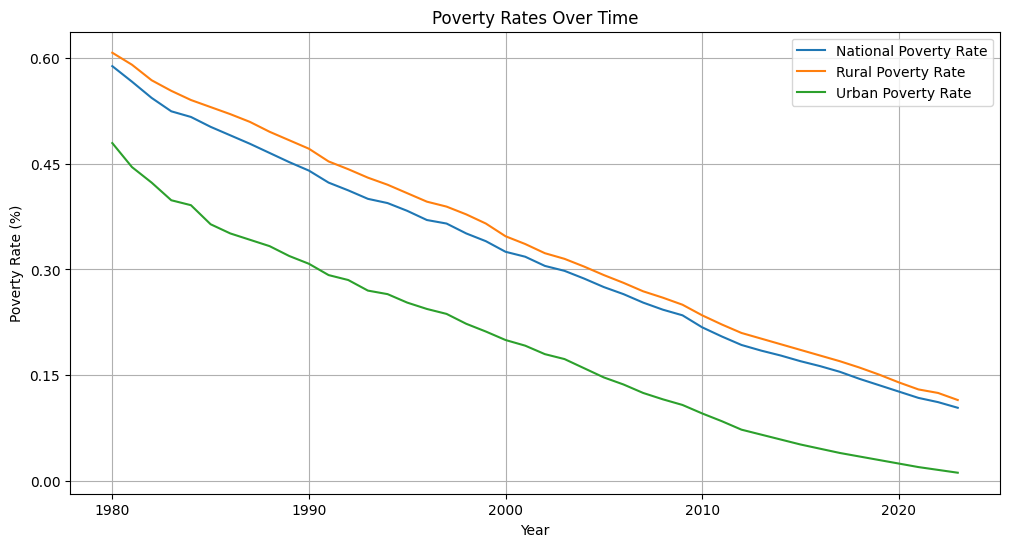

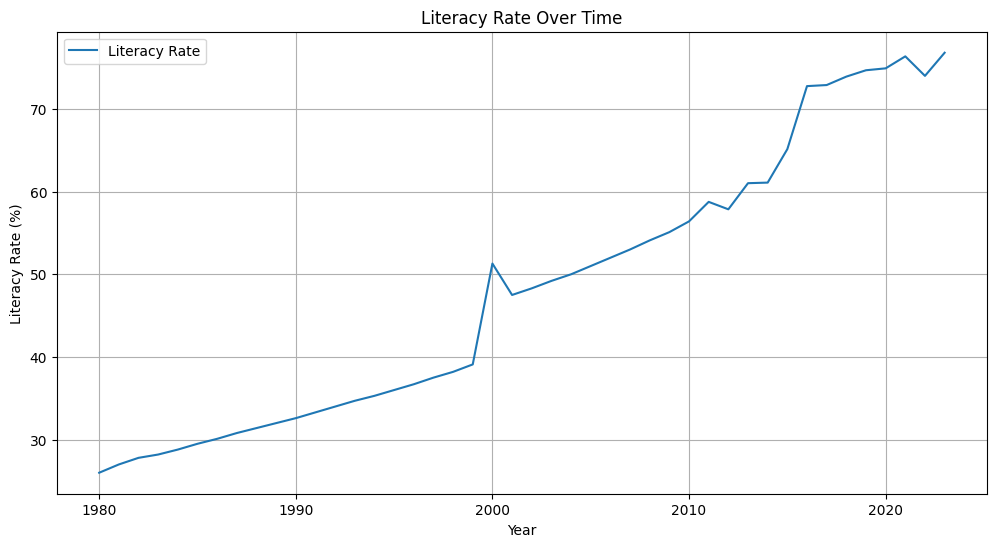

In [ ]:
# Trend Analysis for original data
import numpy as np
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_original, x="Year", y="National Poverty Rate", label="National Poverty Rate")
sns.lineplot(data=data_original, x="Year", y="Rural Poverty Rate", label="Rural Poverty Rate")
sns.lineplot(data=data_original, x="Year", y="Urban Poverty Rate", label="Urban Poverty Rate")
plt.title("Poverty Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Poverty Rate (%)")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_original, x="Year", y="Literacy Rate", label="Literacy Rate")
plt.title("Literacy Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Literacy Rate (%)")
plt.grid(True)
plt.show()

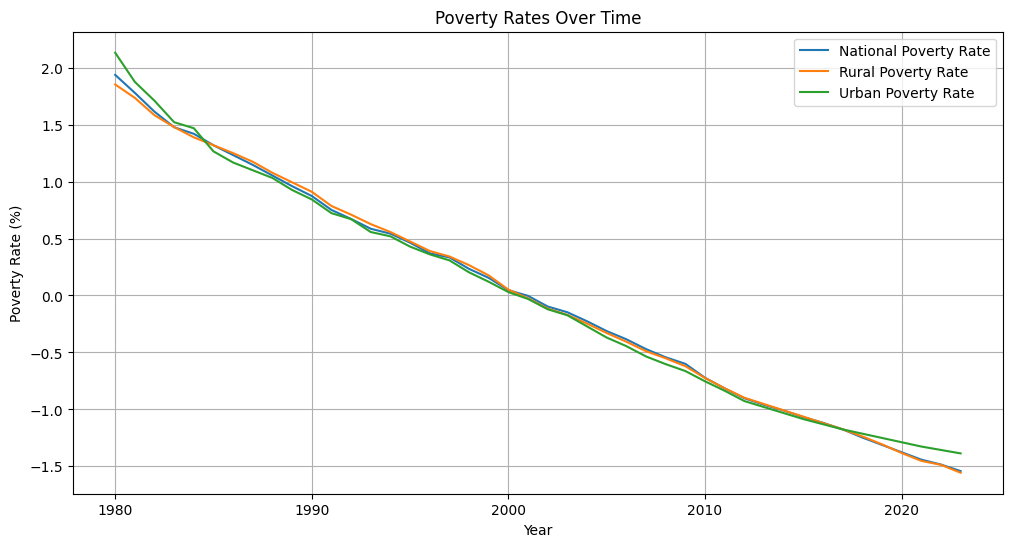

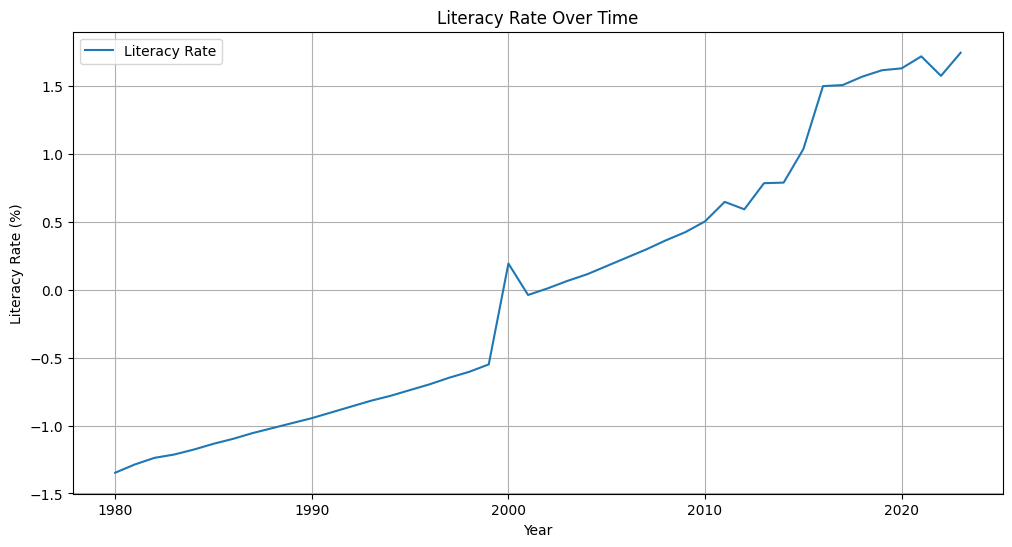

In [ ]:
    # Trend Analysis
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data_subset, x="Year", y="National Poverty Rate", label="National Poverty Rate")
    sns.lineplot(data=data_subset, x="Year", y="Rural Poverty Rate", label="Rural Poverty Rate")
    sns.lineplot(data=data_subset, x="Year", y="Urban Poverty Rate", label="Urban Poverty Rate")
    plt.title("Poverty Rates Over Time")
    plt.xlabel("Year")
    plt.ylabel("Poverty Rate (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data_subset, x="Year", y="Literacy Rate", label="Literacy Rate")
    plt.title("Literacy Rate Over Time")
    plt.xlabel("Year")
    plt.ylabel("Literacy Rate (%)")
    plt.grid(True)
    plt.show()


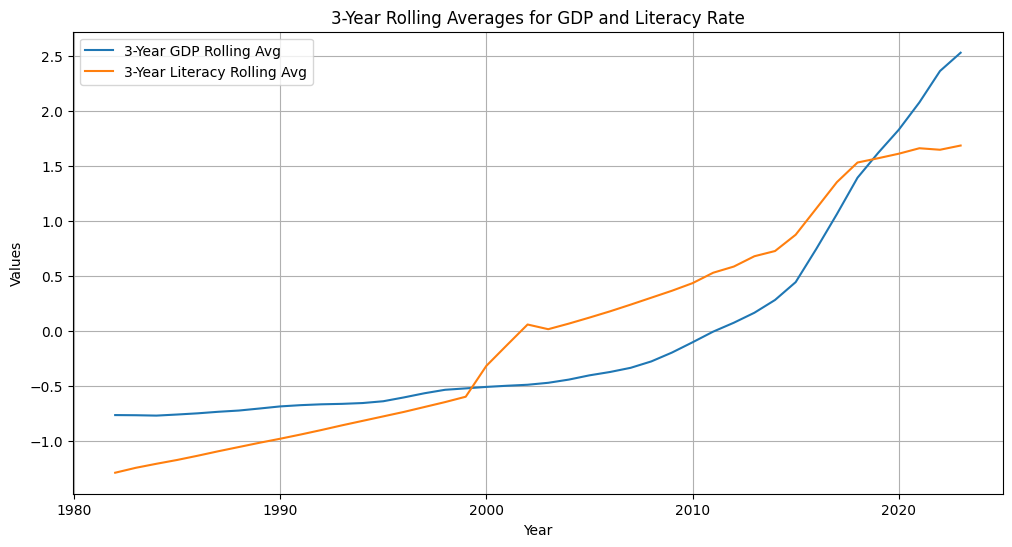

In [ ]:

    # Visualize Rolling Averages
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data_subset, x="Year", y="3-Year GDP Rolling Avg", label="3-Year GDP Rolling Avg")
    sns.lineplot(data=data_subset, x="Year", y="3-Year Literacy Rolling Avg", label="3-Year Literacy Rolling Avg")
    plt.title("3-Year Rolling Averages for GDP and Literacy Rate")
    plt.xlabel("Year")
    plt.ylabel("Values")
    plt.legend()
    plt.grid(True)
    plt.show()


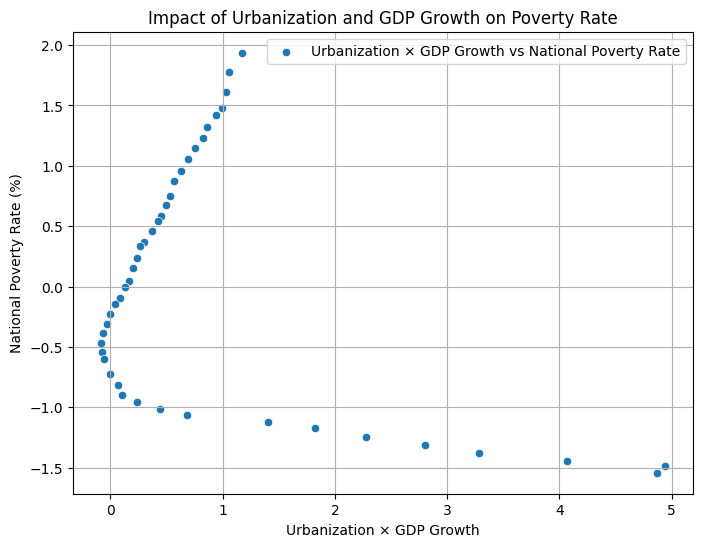

In [ ]:

    # Scatterplot for Interaction Term
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data_subset, x="Urbanization × GDP Growth", y="National Poverty Rate", label="Urbanization × GDP Growth vs National Poverty Rate")
    plt.title("Impact of Urbanization and GDP Growth on Poverty Rate")
    plt.xlabel("Urbanization × GDP Growth")
    plt.ylabel("National Poverty Rate (%)")
    plt.grid(True)
    plt.show()


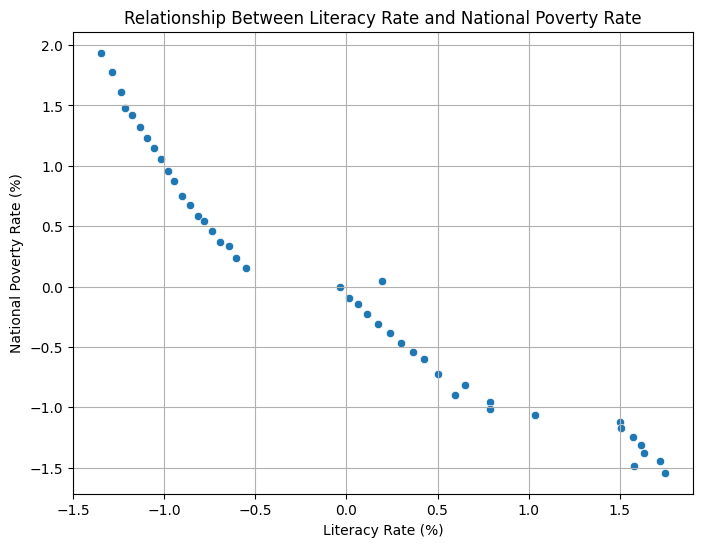

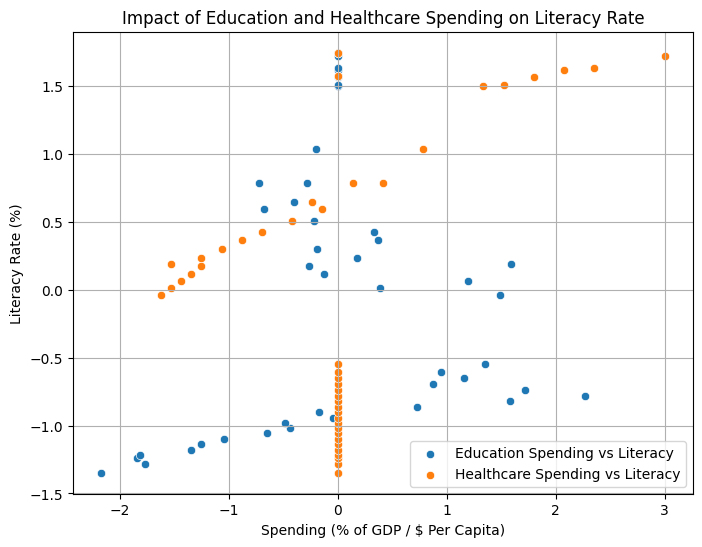

In [ ]:

    # Scatterplots to Analyze Relationships
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data_subset, x="Literacy Rate", y="National Poverty Rate")
    plt.title("Relationship Between Literacy Rate and National Poverty Rate")
    plt.xlabel("Literacy Rate (%)")
    plt.ylabel("National Poverty Rate (%)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data_subset, x="Education Spending", y="Literacy Rate", label="Education Spending vs Literacy")
    sns.scatterplot(data=data_subset, x="Healthcare Spending", y="Literacy Rate", label="Healthcare Spending vs Literacy")
    plt.title("Impact of Education and Healthcare Spending on Literacy Rate")
    plt.xlabel("Spending (% of GDP / $ Per Capita)")
    plt.ylabel("Literacy Rate (%)")
    plt.legend()
    plt.grid(True)
    plt.show()


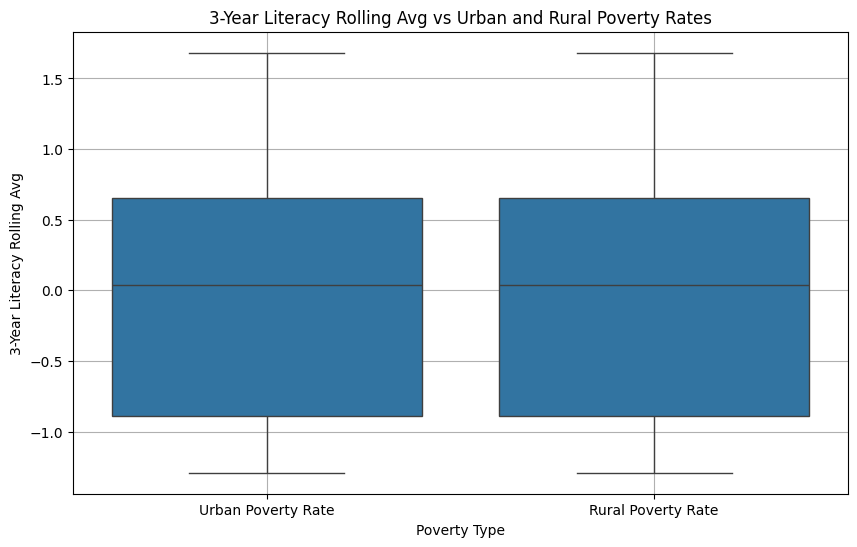

In [ ]:

    # Boxplot for Rolling Literacy Trends vs Poverty Rates
    data_subset_melted = data_subset.melt(
        id_vars=["Year", "3-Year Literacy Rolling Avg"],
        value_vars=["Urban Poverty Rate", "Rural Poverty Rate"],
        var_name="Poverty Type",
        value_name="Poverty Rate"
    )
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_subset_melted, x="Poverty Type", y="3-Year Literacy Rolling Avg")
    plt.title("3-Year Literacy Rolling Avg vs Urban and Rural Poverty Rates")
    plt.xlabel("Poverty Type")
    plt.ylabel("3-Year Literacy Rolling Avg")
    plt.grid(True)
    plt.show()


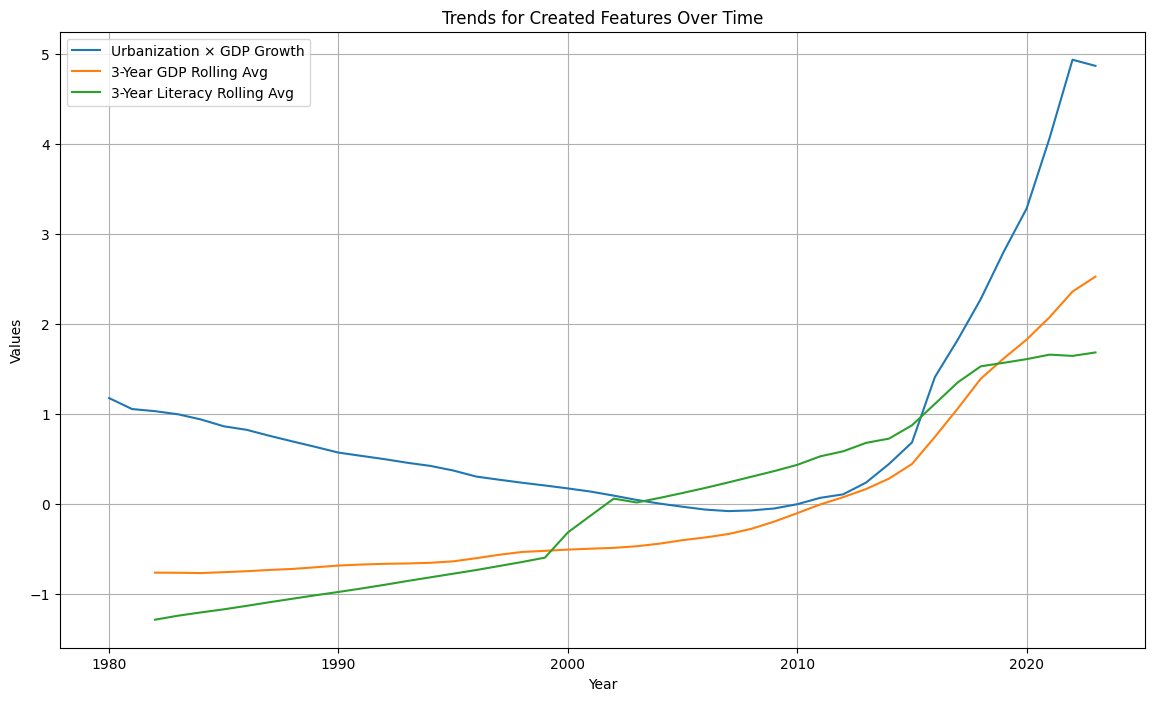

In [ ]:
    # Overlay Trends for Created Features
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=data_subset, x="Year", y="Urbanization × GDP Growth", label="Urbanization × GDP Growth")
    sns.lineplot(data=data_subset, x="Year", y="3-Year GDP Rolling Avg", label="3-Year GDP Rolling Avg")
    sns.lineplot(data=data_subset, x="Year", y="3-Year Literacy Rolling Avg", label="3-Year Literacy Rolling Avg")
    plt.title("Trends for Created Features Over Time")
    plt.xlabel("Year")
    plt.ylabel("Values")
    plt.legend()
    plt.grid(True)
    plt.show()


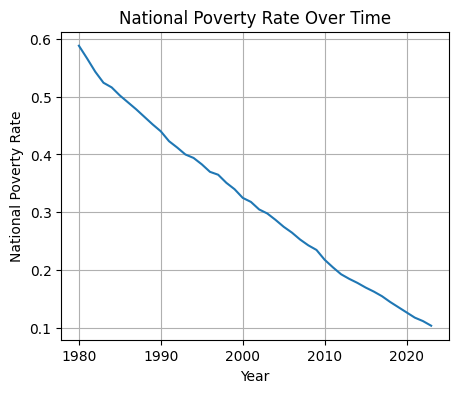

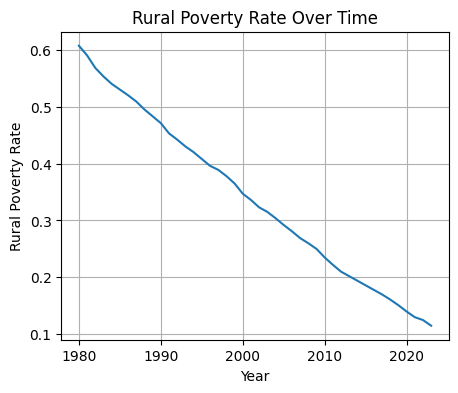

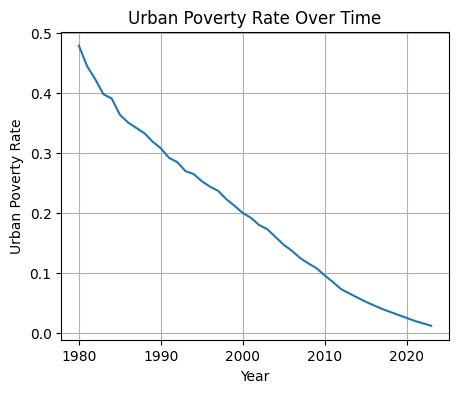

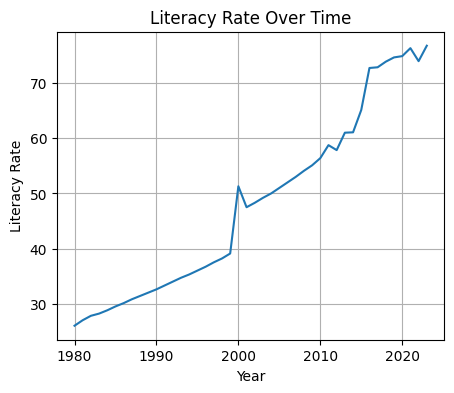

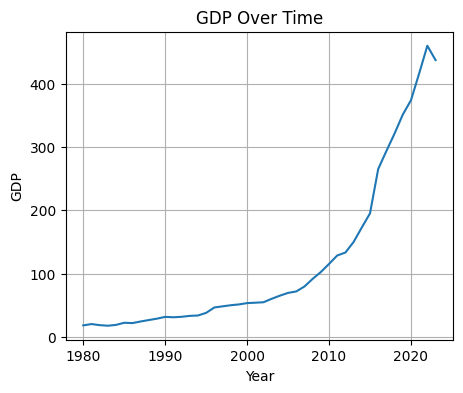

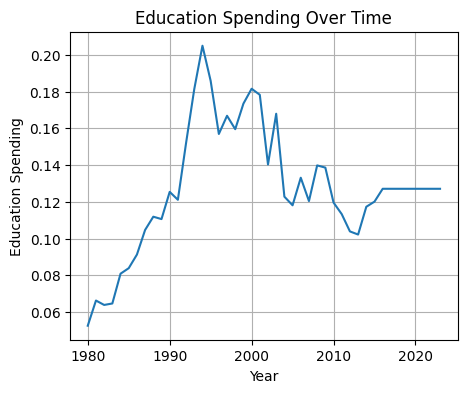

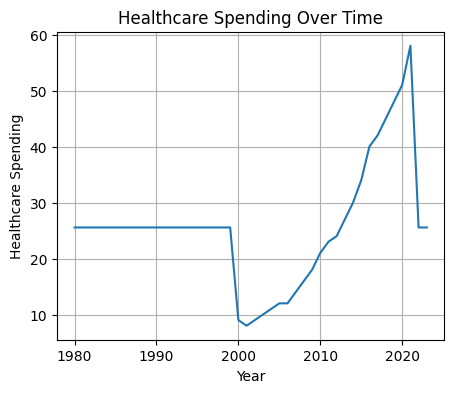

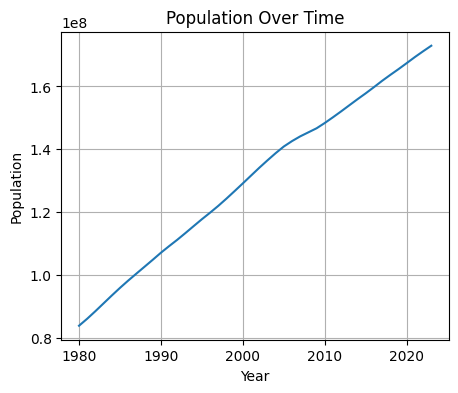

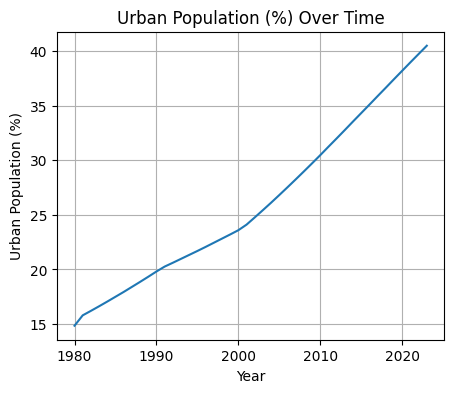

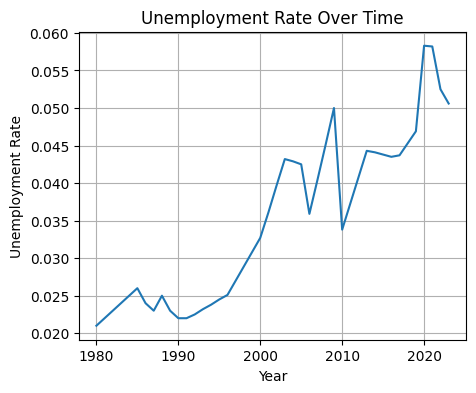

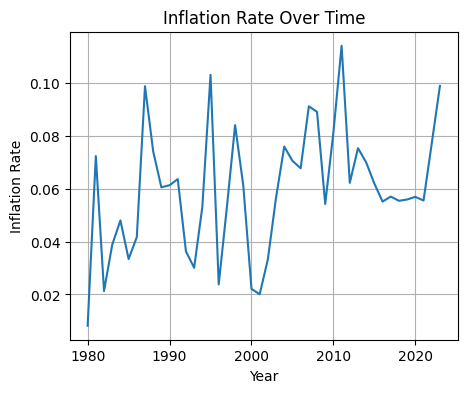

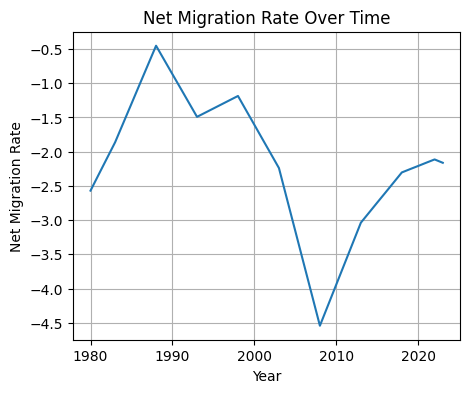

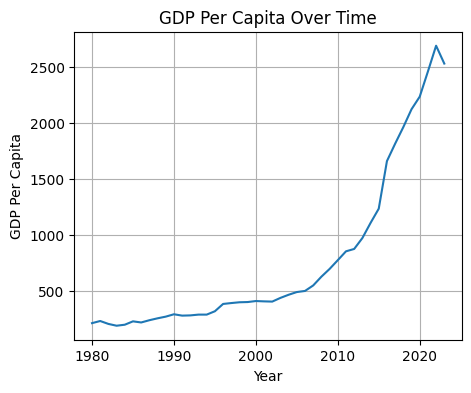

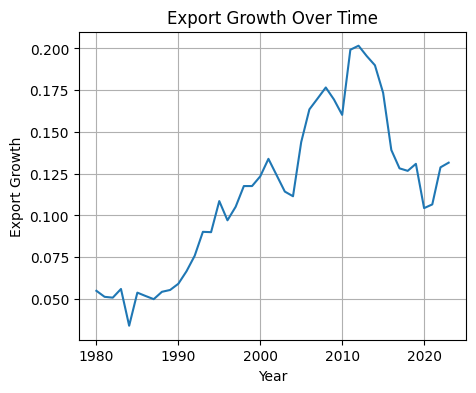

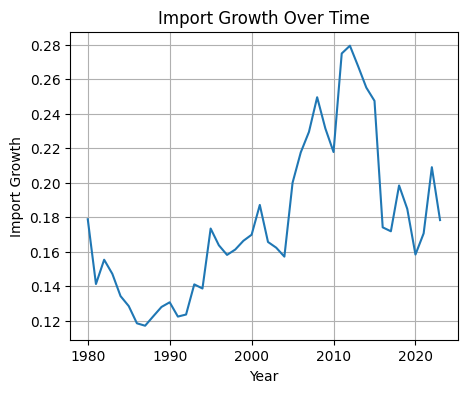

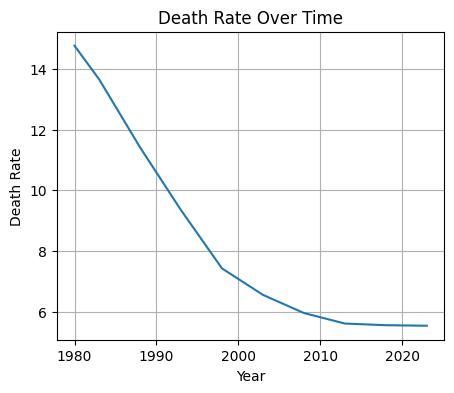

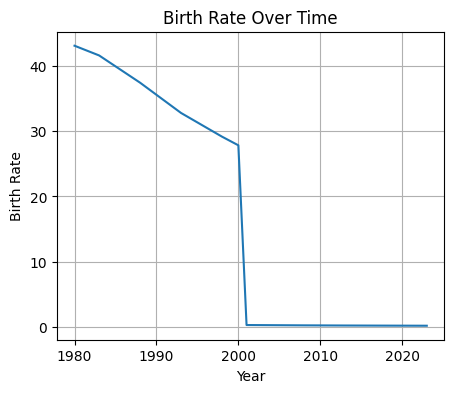

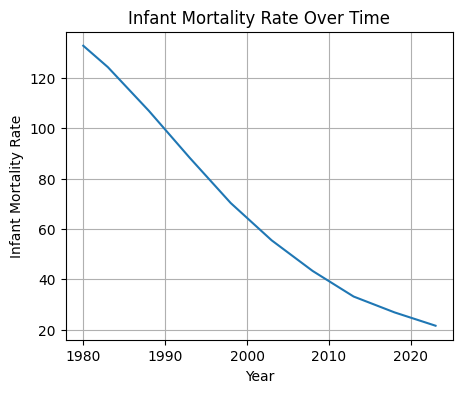

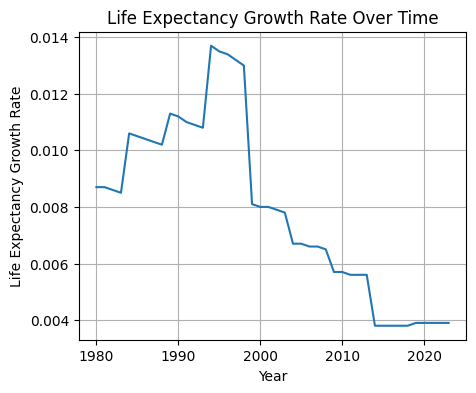

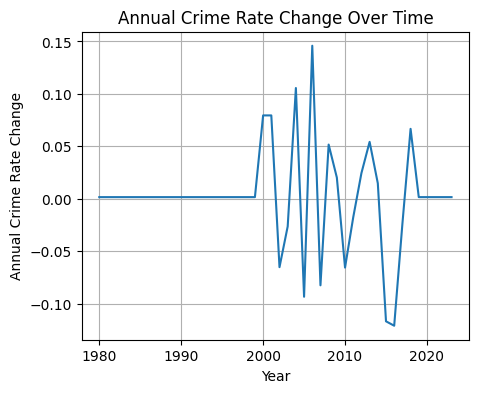

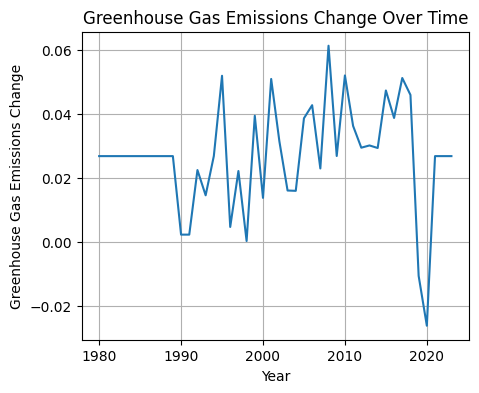

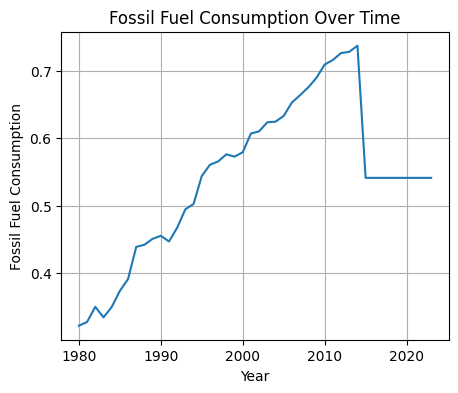

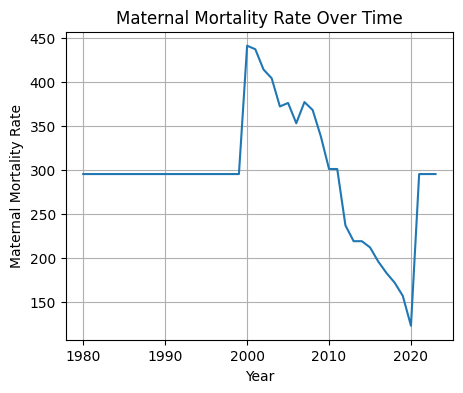

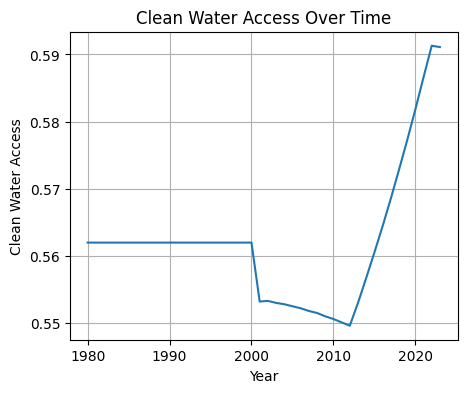

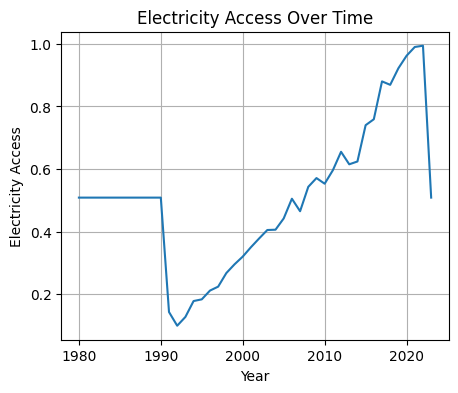

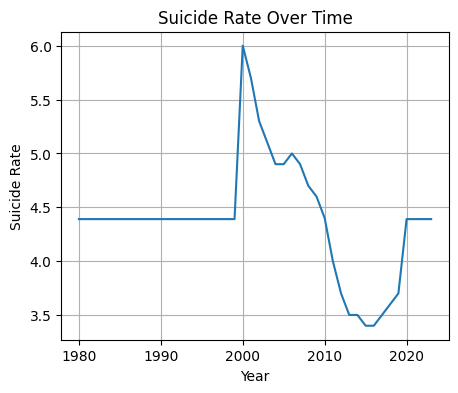

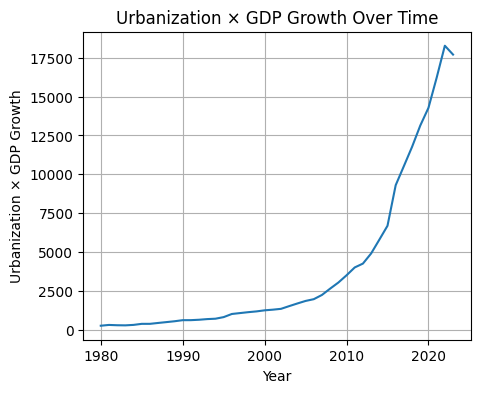

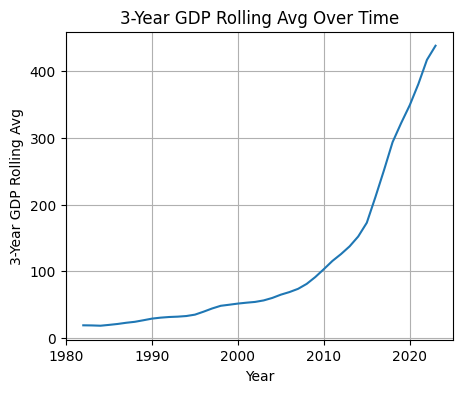

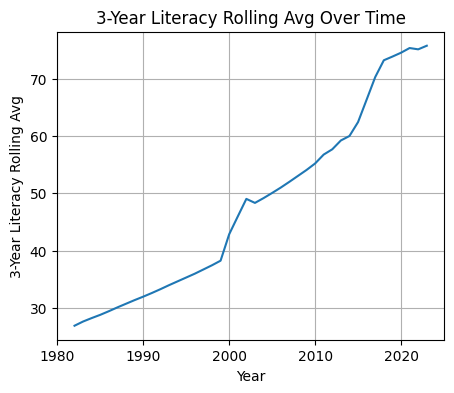

In [ ]:
# create a chart for each feature over time
for col in data_subset.columns[1:]:
    plt.figure(figsize=(5, 4))
    sns.lineplot(data=data_original, x="Year", y=col)
    plt.title(f"{col} Over Time")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()
    print("\n")



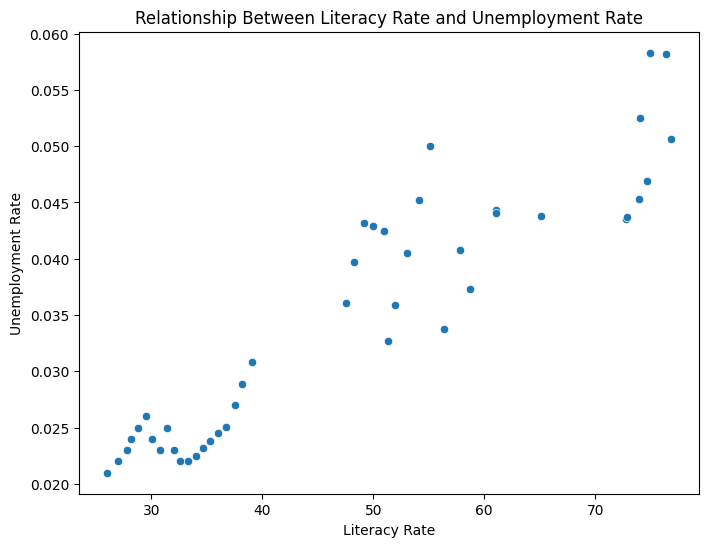

In [ ]:
#scatter plot of literacy rate and unemployment rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_original, x="Literacy Rate", y="Unemployment Rate")
plt.title("Relationship Between Literacy Rate and Unemployment Rate")
plt.xlabel("Literacy Rate")
plt.ylabel
plt.show()

Text(0.5, 0, 'Literacy Rate')

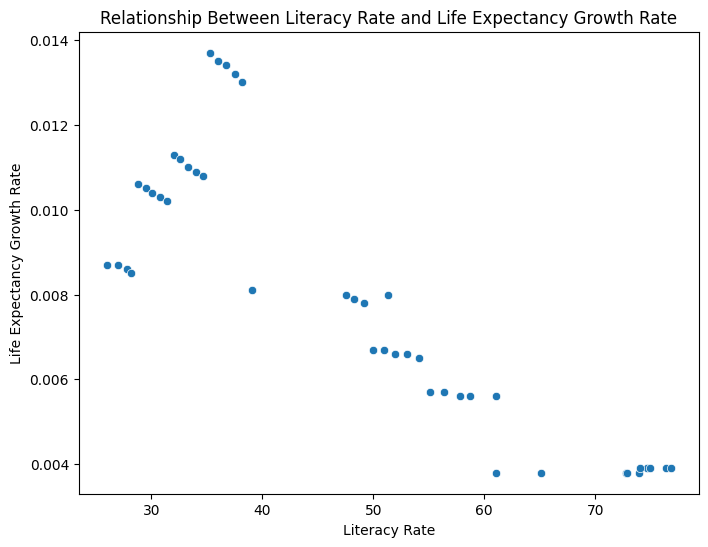

In [ ]:
#scatter plot of literacy rate and Life expectancy growth rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_original, x="Literacy Rate", y="Life Expectancy Growth Rate")
plt.title("Relationship Between Literacy Rate and Life Expectancy Growth Rate")
plt.xlabel("Literacy Rate")

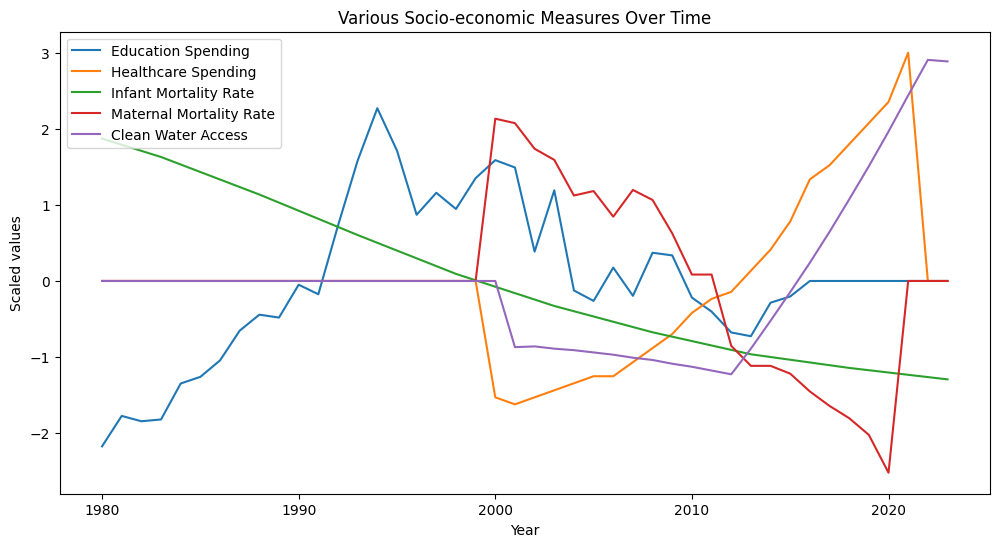

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_subset, x="Year", y="Education Spending", label="Education Spending")
sns.lineplot(data=data_subset, x="Year", y="Healthcare Spending", label="Healthcare Spending")
sns.lineplot(data=data_subset, x="Year", y="Infant Mortality Rate", label="Infant Mortality Rate")
sns.lineplot(data=data_subset, x="Year", y="Maternal Mortality Rate", label="Maternal Mortality Rate")
sns.lineplot(data=data_subset, x="Year", y="Clean Water Access", label="Clean Water Access")
plt.title("Various Socio-economic Measures Over Time")
plt.xlabel("Year")
plt.ylabel("Scaled values")
plt.legend()
plt.show()

###2. feature selection

In [ ]:
# check correlation with National Poverty Rate
correlation_matrix["National Poverty Rate"].sort_values(ascending=False)

,National Poverty Rate
National Poverty Rate,1.000000
Rural Poverty Rate,0.999709
Urban Poverty Rate,0.998054
Infant Mortality Rate,0.992928
Death Rate,0.947170
Birth Rate,0.917431
Life Expectancy Growth Rate,0.775513
Net Migration Rate,0.535455
Maternal Mortality Rate,0.302007
Suicide Rate,0.276712


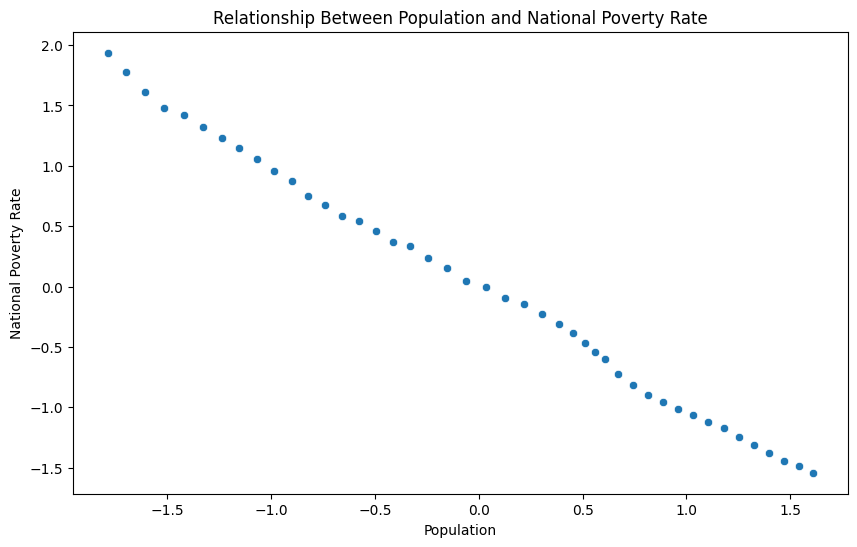

In [ ]:
#scatter plot for National Poverty Rate vs Population
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_subset, x="Population", y="National Poverty Rate")
plt.title("Relationship Between Population and National Poverty Rate")
plt.xlabel("Population")
plt.ylabel
plt.show()

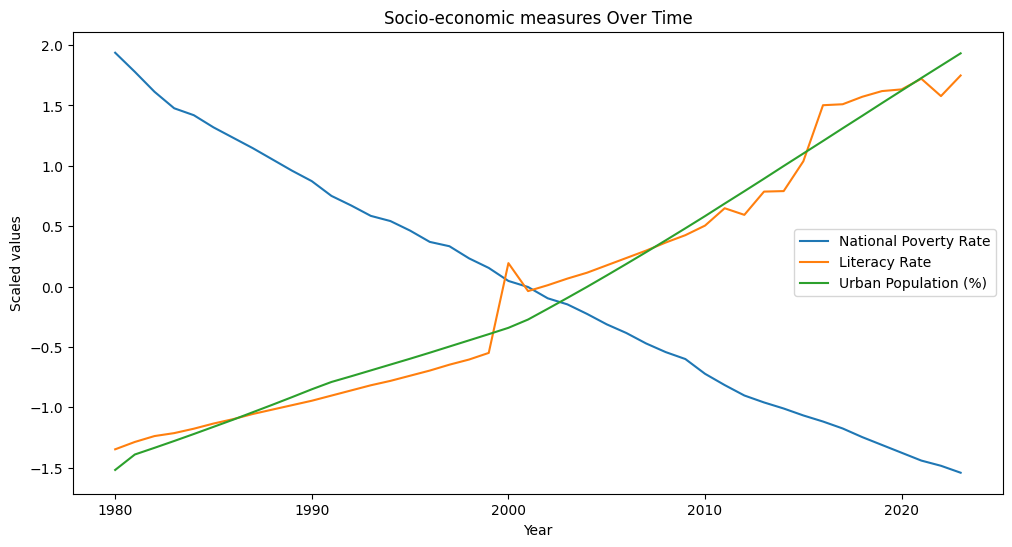

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_subset, x="Year", y="National Poverty Rate", label="National Poverty Rate")
sns.lineplot(data=data_subset, x="Year", y="Literacy Rate", label="Literacy Rate")
sns.lineplot(data=data_subset, x="Year", y="Urban Population (%)", label="Urban Population (%)")
#sns.lineplot(data=data_subset, x="Year", y="Maternal Mortality Rate", label="Maternal Mortality Rate")
#sns.lineplot(data=data_subset, x="Year", y="Clean Water Access", label="Clean Water Access")
plt.title("Socio-economic measures Over Time")
plt.xlabel("Year")
plt.ylabel("Scaled values")
plt.legend()
plt.show()

In [ ]:
# correlation with Literacy Rate
correlation_matrix = data_subset.corr()
correlation_with_literacy = correlation_matrix["Literacy Rate"].sort_values(ascending=False)
print("\nCorrelation with Literacy Rate:")
print(correlation_with_literacy)


Correlation with Literacy Rate:
Literacy Rate                      1.000000
3-Year Literacy Rolling Avg        0.995405
Urban Population (%)               0.988159
Year                               0.980226
Population                         0.972824
Unemployment Rate                  0.928044
GDP Per Capita                     0.901279
GDP                                0.897481
3-Year GDP Rolling Avg             0.888713
Electricity Access                 0.711008
Export Growth                      0.695975
Fossil Fuel Consumption            0.589086
Import Growth                      0.585368
Urbanization × GDP Growth          0.535440
Healthcare Spending                0.416864
Clean Water Access                 0.397836
Inflation Rate                     0.294528
Education Spending                 0.154902
Greenhouse Gas Emissions Change    0.086434
Annual Crime Rate Change          -0.083553
Suicide Rate                      -0.305661
Maternal Mortality Rate           -0.370832

In [ ]:
# correlation with National Poverty Rate
correlation_matrix = data_subset.corr()
correlation_with_literacy = correlation_matrix["National Poverty Rate"].sort_values(ascending=False)
print("\nCorrelation with National Poverty Rate:")
print(correlation_with_literacy)


Correlation with National Poverty Rate:
National Poverty Rate              1.000000
Rural Poverty Rate                 0.999709
Urban Poverty Rate                 0.998054
Infant Mortality Rate              0.992928
Death Rate                         0.947170
Birth Rate                         0.917431
Life Expectancy Growth Rate        0.775513
Net Migration Rate                 0.535455
Maternal Mortality Rate            0.302007
Suicide Rate                       0.276712
Annual Crime Rate Change           0.071631
Greenhouse Gas Emissions Change   -0.102458
Clean Water Access                -0.275660
Education Spending                -0.301818
Healthcare Spending               -0.311259
Inflation Rate                    -0.373114
Urbanization × GDP Growth         -0.396160
Electricity Access                -0.574456
Import Growth                     -0.652610
Fossil Fuel Consumption           -0.740503
Export Growth                     -0.799517
GDP                               -

In [ ]:
# drop features with multicollinearity
drop_multicollinearity = ["GDP", "GDP Per Capita", "Urban Population (%)", "Urban Poverty Rate", "Rural Poverty Rate", "Population",
                          "Fossil Fuel Consumption", "Import Growth", "Death Rate", "Infant Mortality Rate", "Maternal Mortality Rate",
                          "Clean Water Access", "Unemployment Rate", "Birth Rate", "3-Year GDP Rolling Avg", "Literacy Rate"]
data_subset2 = data_subset.drop(columns=drop_multicollinearity)

# drop features with weak correlation
drop_weak = ["Greenhouse Gas Emissions Change", "Annual Crime Rate Change"]
data_subset3 = data_subset2.drop(columns=drop_weak)

data_subset3.columns

Index(['Year', 'National Poverty Rate', 'Education Spending',
       'Healthcare Spending', 'Inflation Rate', 'Net Migration Rate',
       'Export Growth', 'Life Expectancy Growth Rate', 'Electricity Access',
       'Suicide Rate', 'Urbanization × GDP Growth',
       '3-Year Literacy Rolling Avg'],
      dtype='object')

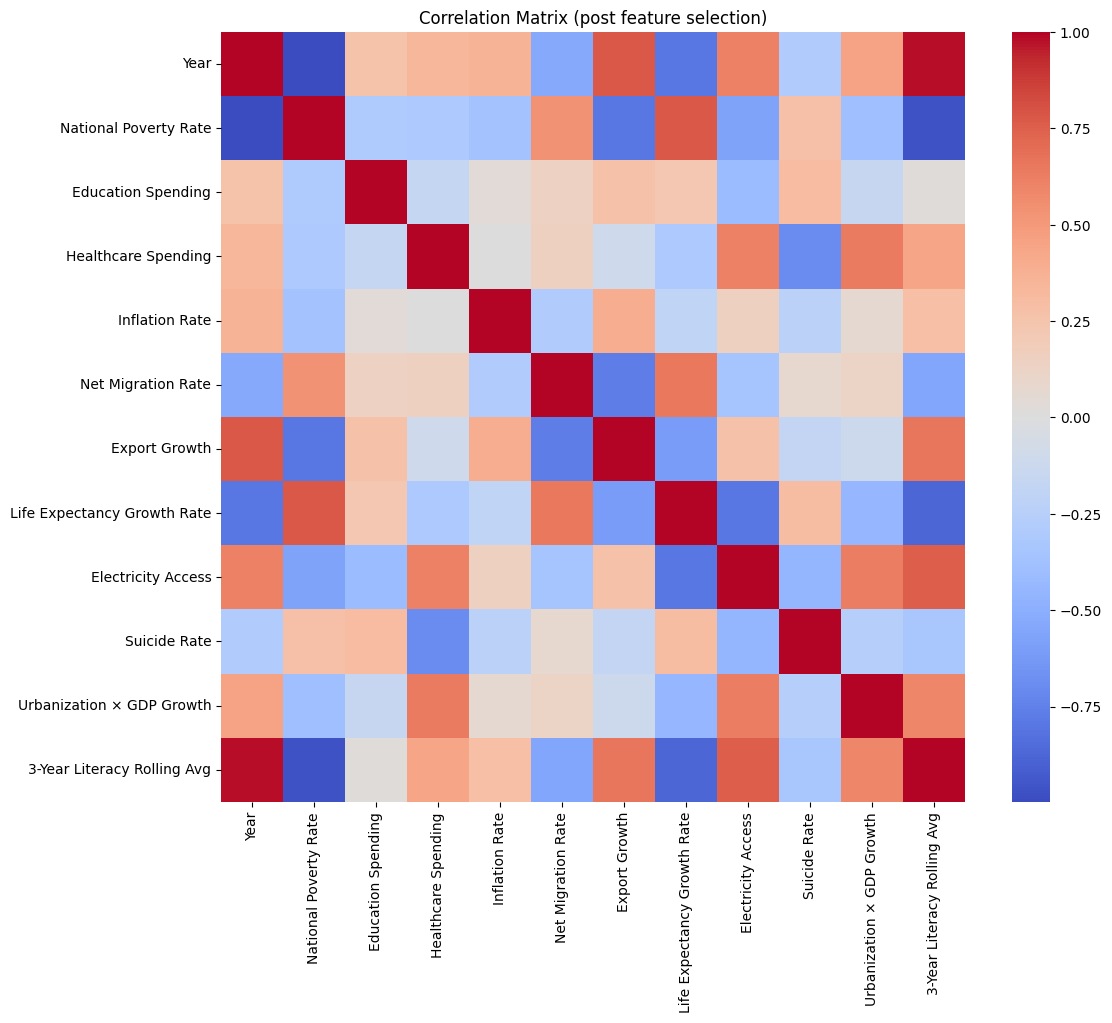

In [ ]:
  # Correlation Matrix
correlation_matrix = data_subset3.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (post feature selection)")
plt.show()

###3. Assumption test

In [ ]:
# missing variable, impute with mean
from sklearn.impute import SimpleImputer

data_subset4 = data_subset3.copy()
imputer = SimpleImputer(strategy="mean")
data_subset4.iloc[:, 1:] = imputer.fit_transform(data_subset3.iloc[:, 1:])

# assumption test - stationarity for each variable
from statsmodels.tsa.stattools import adfuller

for col in data_subset4.columns[1:]:
    print(f"Testing for Stationarity of {col}:")
    result = adfuller(data_subset4[col])
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')  # p < 0.05 → Stationary, p > 0.05 → Not Stationary
    print("\n")

# create a list of features that are not stationary
non_stationary_features = [col for col in data_subset4.columns[1:] if adfuller(data_subset4[col])[1] > 0.05]
print("Non-Stationary Features:", non_stationary_features)


Testing for Stationarity of National Poverty Rate:
ADF Statistic: -4.763823203330587
p-value: 6.374826725818937e-05


Testing for Stationarity of Education Spending:
ADF Statistic: -3.544900041245629
p-value: 0.006906122959191104


Testing for Stationarity of Healthcare Spending:
ADF Statistic: -1.8008294343679248
p-value: 0.38004998028956016


Testing for Stationarity of Inflation Rate:
ADF Statistic: -5.145502940672432
p-value: 1.1347447558833673e-05


Testing for Stationarity of Net Migration Rate:
ADF Statistic: -2.371684077838328
p-value: 0.14988835272038342


Testing for Stationarity of Export Growth:
ADF Statistic: -1.3197905082476749
p-value: 0.6200702019437832


Testing for Stationarity of Life Expectancy Growth Rate:
ADF Statistic: -0.6543480750939475
p-value: 0.8582228137788708


Testing for Stationarity of Electricity Access:
ADF Statistic: -1.4191514377955283
p-value: 0.5730610243262942


Testing for Stationarity of Suicide Rate:
ADF Statistic: -1.807758642953694
p-value: 

### 4. predictive model

In [ ]:
print(data_subset4.shape)
print(data_subset4.head())
print(data_subset4.info())

(44, 12)
   Year  National Poverty Rate  Education Spending  Healthcare Spending  \
0  1980               1.936390           -2.174833                  0.0   
1  1981               1.778304           -1.774808                  0.0   
2  1982               1.613032           -1.844885                  0.0   
3  1983               1.476503           -1.821526                  0.0   
4  1984               1.419017           -1.348503                  0.0   

   Inflation Rate  Net Migration Rate  Export Growth  \
0       -2.175351           -0.404870      -1.244337   
1        0.536530           -0.170065      -1.320995   
2       -1.621129            0.063745      -1.331642   
3       -0.880755            0.297555      -1.220914   
4       -0.491531            0.578128      -1.689379   

   Life Expectancy Growth Rate  Electricity Access  Suicide Rate  \
0                     0.252218                 0.0  1.634136e-15   
1                     0.252218                 0.0  1.634136e-15   

In [ ]:
#!pip install --upgrade scikit-learn

#### 4.1 Random Forest Model

Starting grid search with time-series validation...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


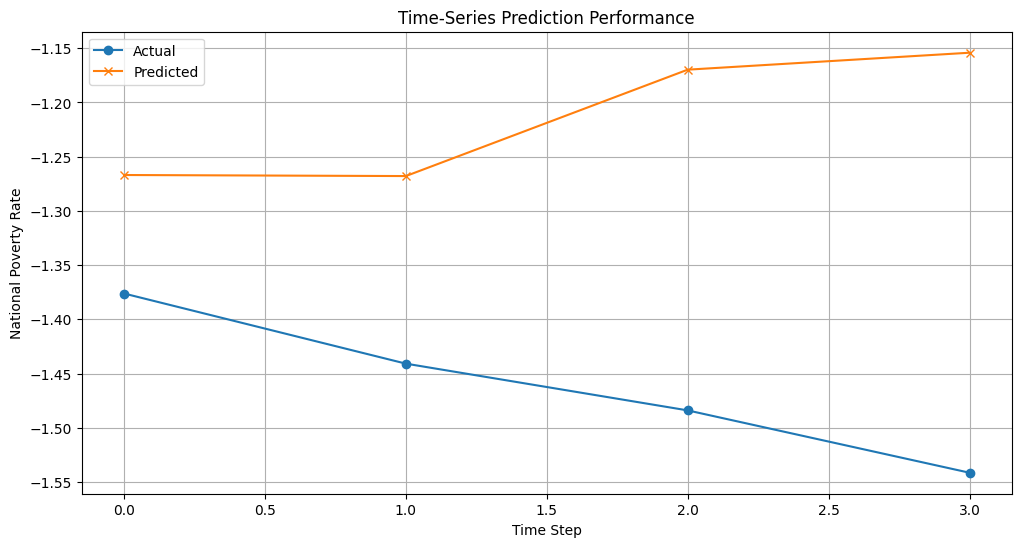


Best Parameters: {'max_depth': None, 'max_features': 0.8, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'n_estimators': 200}

Performance Metrics:
 Train RMSE     0.021702
Test RMSE      0.269561
Train MAE      0.017697
Test MAE       0.245967
Train R²       0.997422
Test R²      -18.908087

Feature Importance:
                     Feature  Importance
3-Year Literacy Rolling Avg    0.346535
        Healthcare Spending    0.320461
Life Expectancy Growth Rate    0.182795
    Urbanization_GDP_Growth    0.054611
         Net Migration Rate    0.031819
              Export Growth    0.023393
         Education Spending    0.021718
             Inflation Rate    0.018670


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


def preprocess_time_series_data(df):
    """Time-series specific preprocessing"""
    # Clean column names and sort by year
    df = df.rename(columns={'Urbanization × GDP Growth': 'Urbanization_GDP_Growth'})
    df = df.sort_values('Year').reset_index(drop=True)

    # Handle zero values in Healthcare Spending
    df['Healthcare Spending'] = np.where(
        (df['Healthcare Spending'] == 0) & (df['Year'] < 2000),
        np.nan,
        df['Healthcare Spending']
    )
    df['Healthcare Spending'] = df['Healthcare Spending'].ffill()

    # Remove non-informative columns
    df = df.drop(columns=['Year', 'Electricity Access', 'Suicide Rate'])

    return df.dropna()

processed_data = preprocess_time_series_data(data_subset4)

# Split features and target
X = processed_data.drop(columns=['National Poverty Rate'])
y = processed_data['National Poverty Rate']

# Time-series aware train-test split (last 20% as test)
test_size = int(len(X) * 0.2)
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# Time-series cross-validation configuration
tscv = TimeSeriesSplit(n_splits=5)

# Hyperparameter grid with regularization parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.8],
    'min_impurity_decrease': [0.0, 0.1]
}

# Initialize and tune Random Forest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

print("Starting grid search with time-series validation...")
grid_search.fit(X_train, y_train)

# Best model evaluation
best_rf = grid_search.best_estimator_

def time_series_evaluate(model, X_train, X_test, y_train, y_test):
    """Time-series specific evaluation"""
    # Generate predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test)
    }

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual', marker='o')
    plt.plot(y_pred_test, label='Predicted', marker='x')
    plt.title('Time-Series Prediction Performance')
    plt.xlabel('Time Step')
    plt.ylabel('National Poverty Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    return pd.Series(metrics)

# Evaluate and show results
metrics = time_series_evaluate(best_rf, X_train, X_test, y_train, y_test)
print("\nBest Parameters:", grid_search.best_params_)
print("\nPerformance Metrics:\n", metrics.to_string())

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance.to_string(index=False))

#### 4.2 Lasso Regression

In [ ]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV

# Load data and sort by year
data_subset = data_subset4.sort_values('Year')

# Feature Engineering
data_subset['Poverty_Rate_Lag1'] = data_subset['National Poverty Rate'].shift(1)
data_subset['Poverty_Rate_Lag2'] = data_subset['National Poverty Rate'].shift(2)
data_subset['Poverty_Rate_Rolling3'] = (
    data_subset['National Poverty Rate']
    .rolling(window=3, min_periods=1, closed='left')  # Ensure no future leakage
    .mean()
)

# Impute missing values (instead of dropping)
data_subset.fillna(0, inplace=True)  # Or use forward-fill

# Define target and predictors
X = data_subset.drop(columns=['National Poverty Rate', 'Year'])
y = data_subset['National Poverty Rate']

# Train-test split (last 20% as test)
test_size = int(0.2 * len(X))
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Hyperparameter tuning with TimeSeriesSplit
param_grid = {'alpha': np.logspace(-5, 3, 50)}  # Wider alpha range

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    lasso_cv = GridSearchCV(
        Lasso(max_iter=10000),
        param_grid,
        cv=tscv,  # Use TimeSeriesSplit
        scoring='neg_mean_squared_error'
    )
    lasso_cv.fit(X_train_scaled, y_train)

# Best model
best_lasso = lasso_cv.best_estimator_

# Predictions and evaluation
y_pred_train = best_lasso.predict(X_train_scaled)
y_pred_test = best_lasso.predict(X_test_scaled)

print("Train Metrics:")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"MSE: {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"R²: {r2_score(y_train, y_pred_train):.4f}\n")

print("Test Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R²: {r2_score(y_test, y_pred_test):.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lasso.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print("\nFeature Importance:\n", feature_importance)

Train Metrics:
MAE: 0.0736
MSE: 0.0085
R²: 0.9884

Test Metrics:
MAE: 3.1801
MSE: 16.5092
R²: -830.0116

Feature Importance:
                         Feature  Coefficient
9   3-Year Literacy Rolling Avg    -1.559530
11            Poverty_Rate_Lag2    -1.258370
10            Poverty_Rate_Lag1     0.962675
12        Poverty_Rate_Rolling3    -0.841784
8     Urbanization × GDP Growth     0.660744
1           Healthcare Spending    -0.426611
3            Net Migration Rate    -0.217992
4                 Export Growth    -0.154719
0            Education Spending    -0.129683
7                  Suicide Rate    -0.090553
5   Life Expectancy Growth Rate     0.082975
6            Electricity Access     0.019748
2                Inflation Rate    -0.004280


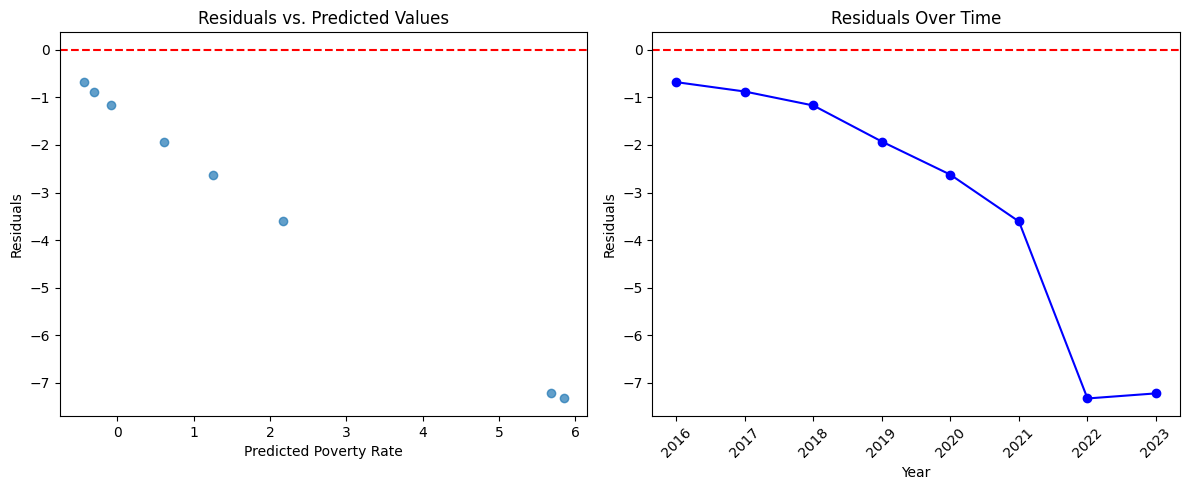

In [ ]:
# Residual Plot
import matplotlib.pyplot as plt

# Predictions and residuals
y_pred_test = best_lasso.predict(X_test_scaled)
residuals = y_test - y_pred_test

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Poverty Rate')
plt.ylabel('Residuals')

# Plot residuals over time (test set years)
test_years = data_subset['Year'].iloc[-len(y_test):]
plt.subplot(1, 2, 2)
plt.plot(test_years, residuals, marker='o', linestyle='-', color='b')
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.3 VAR Model

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ==============================================
# 1. Data Preparation & Cleaning
# ==============================================
data = data_subset4.sort_values('Year').set_index('Year')
data.replace(0, np.nan, inplace=True)
data.fillna(method='ffill', inplace=True)
data = data.drop(columns=['Electricity Access', 'Suicide Rate'])

# ==============================================
# 2. Stationarity Transformation (Dynamic Handling)
# ==============================================
def make_stationary(df, target_col):
    stationary_df = df.copy()
    # Check if target needs differencing
    p_value_target = adfuller(df[target_col].dropna())[1]
    if p_value_target > 0.05:
        stationary_df[f"{target_col}_diff"] = df[target_col].diff()
        stationary_df.drop(target_col, axis=1, inplace=True)
        target_var = f"{target_col}_diff"
    else:
        target_var = target_col

    # Check other features
    for col in df.columns:
        if col != target_col:
            p_value = adfuller(df[col].dropna())[1]
            if p_value > 0.05:
                stationary_df[f"{col}_diff"] = df[col].diff()
                stationary_df.drop(col, axis=1, inplace=True)
    return stationary_df.dropna(), target_var

stationary_data, target_var = make_stationary(data, 'National Poverty Rate')

# ==============================================
# 3. Feature Selection (Granger Causality) - Updated
# ==============================================
candidate_features = [col for col in stationary_data.columns if col != target_var]
significant_features = []

print("\nGranger Causality Results:")
for feature in candidate_features:
    test_result = grangercausalitytests(stationary_data[[target_var, feature]], maxlag=2, verbose=False)
    p_values = [test_result[i+1][0]['ssr_chi2test'][1] for i in range(2)]
    min_p = min(p_values)
    print(f"{feature}: min p-value = {min_p:.4f}")
    if min_p < 0.1:  # Relaxed threshold
        significant_features.append(feature)

final_features = [target_var] + significant_features
filtered_data = stationary_data[final_features]

# Add variance filtering
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
filtered_data = pd.DataFrame(
    selector.fit_transform(filtered_data),
    columns=filtered_data.columns[selector.get_support()]
)

print("\nFinal Features After Filtering:", filtered_data.columns.tolist())

# ==============================================
# 4. Train-Test Split & Model Fitting
# ==============================================
test_size = 5
train = filtered_data.iloc[:-test_size]
test = filtered_data.iloc[-test_size:]

model = VAR(train)
lag_order = model.select_order(maxlags=3).selected_orders['aic']
var_model = model.fit(lag_order)

# ==============================================
# 5. Feature Importance Analysis (Updated)
# ==============================================
def calculate_var_feature_importance(model, target_index):
    """Calculate and format feature importance with full feature listing"""
    coeffs = model.coefs
    importance = {feature: 0.0 for feature in train.columns if feature != target_var}

    # Calculate raw importance scores
    for lag in range(lag_order):
        for idx, feature in enumerate(train.columns):
            if idx == target_index: continue
            importance[feature] += np.abs(coeffs[lag][target_index, idx])

    # Convert to DataFrame and sort
    importance_df = pd.DataFrame.from_dict(importance, orient='index', columns=['Importance'])
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Add percentage contribution
    total_importance = importance_df['Importance'].sum()
    importance_df['Percentage'] = (importance_df['Importance'] / total_importance * 100).round(2)

    return importance_df

target_index = list(train.columns).index(target_var)
importance_df = calculate_var_feature_importance(var_model, target_index)

print("\nFeature Importance Ranking:")
print("="*40)
print(importance_df.to_string(float_format=lambda x: f"{x:.4f}"))
print("\nKey Observations:")
print(f"- Top 3 drivers: {', '.join(importance_df.index[:3])}")
print(f"- Total explained importance: {importance_df['Percentage'].sum():.1f}%")

# ==============================================
# 6. Metrics Calculation (Train & Test)
# ==============================================
# Train metrics
train_pred = var_model.fittedvalues
train_actual = train[target_var].iloc[lag_order:]

train_metrics = {
    'Train RMSE': np.sqrt(mean_squared_error(train_actual, train_pred[target_var])),
    'Train MAE': mean_absolute_error(train_actual, train_pred[target_var]),
    'Train R²': r2_score(train_actual, train_pred[target_var])
}

# Test metrics
lagged_values = train.values[-lag_order:]
forecast = var_model.forecast(y=lagged_values, steps=test_size)
forecast_df = pd.DataFrame(forecast, columns=filtered_data.columns, index=test.index)

# Reconstruct original scale if target was differenced
if '_diff' in target_var:
    last_known_value = data['National Poverty Rate'].iloc[-test_size - lag_order - 1]
    forecast_values = last_known_value + forecast_df[target_var].cumsum()
else:
    forecast_values = forecast_df[target_var]

y_true = data['National Poverty Rate'].iloc[-test_size:]
y_pred = forecast_values

test_metrics = {
    'Test RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
    'Test MAE': mean_absolute_error(y_true, y_pred),
    'Test R²': r2_score(y_true, y_pred)
}

# Combine metrics
metrics_df = pd.DataFrame([train_metrics, test_metrics], index=['Train', 'Test'])
print("\nPerformance Metrics:")
print(metrics_df)



Granger Causality Results:
Education Spending: min p-value = 0.4643
Inflation Rate: min p-value = 0.5401
Healthcare Spending_diff: min p-value = 0.2259
Net Migration Rate_diff: min p-value = 0.0013
Export Growth_diff: min p-value = 0.6106
Life Expectancy Growth Rate_diff: min p-value = 0.4164
Urbanization × GDP Growth_diff: min p-value = 0.4628
3-Year Literacy Rolling Avg_diff: min p-value = 0.6234

Final Features After Filtering: ['National Poverty Rate', 'Net Migration Rate_diff']

Feature Importance Ranking:
                         Importance  Percentage
Net Migration Rate_diff      0.1192    100.0000

Key Observations:
- Top 3 drivers: Net Migration Rate_diff
- Total explained importance: 100.0%

Performance Metrics:
       Train RMSE  Train MAE  Train R²  Test RMSE  Test MAE   Test R²
Train    0.013896   0.011833  0.998376        NaN       NaN       NaN
Test          NaN        NaN       NaN   0.022142  0.016789  0.924304


<ipython-input-62-b11c698b48c8>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is dep

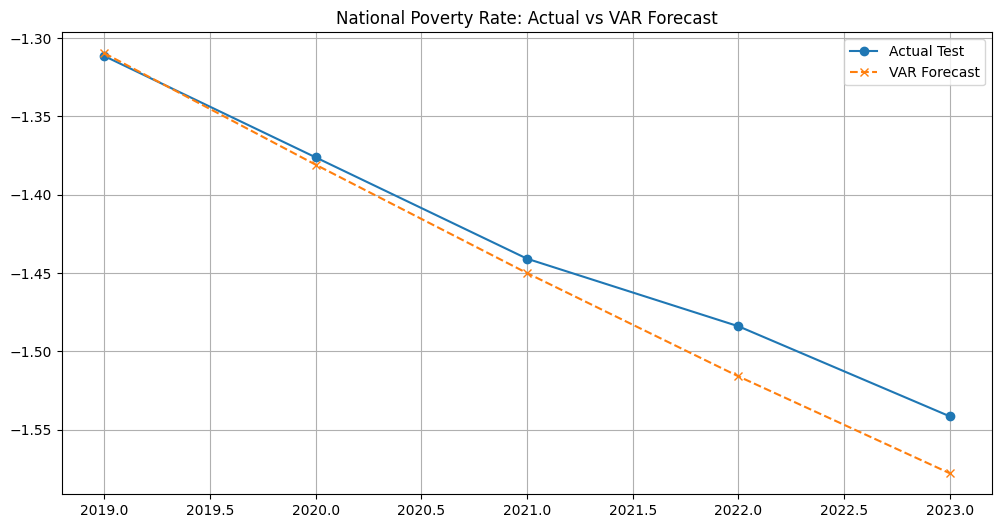

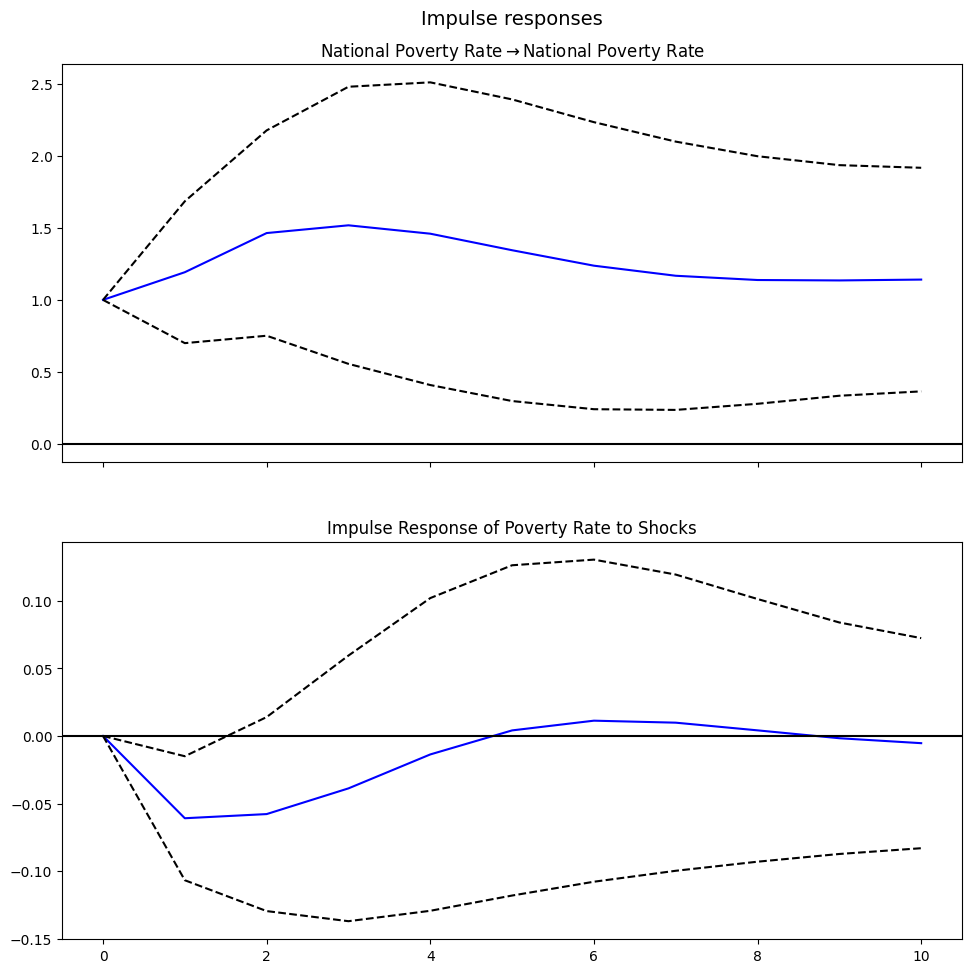

In [ ]:
# ==============================================
# 7. Visualization
# ==============================================
plt.figure(figsize=(12, 6))
plt.plot(data.index[-test_size:], y_true, label='Actual Test', marker='o')
plt.plot(data.index[-test_size:], y_pred, label='VAR Forecast', linestyle='--', marker='x')
plt.title('National Poverty Rate: Actual vs VAR Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Impulse Response Analysis
irf = var_model.irf(periods=10)
irf.plot(orth=False, response=target_var)
plt.title('Impulse Response of Poverty Rate to Shocks')
plt.show()

#### 4.4 Elastic Net Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Load dataset (assuming df is already loaded)
X = data_subset4.drop(columns=["Year", "National Poverty Rate"])  # Remove non-predictive columns
y = data_subset4["National Poverty Rate"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Elastic Net and parameter grid
elastic_net = ElasticNet(random_state=42)
param_grid = {
    'alpha': np.logspace(-3, 2, 10),  # Regularization strength
    'l1_ratio': np.linspace(0.1, 0.9, 5)  # Balance between L1 & L2
}

# Grid search with cross-validation (5 folds)
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from tuning
best_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Best L1 Ratio: {grid_search.best_params_['l1_ratio']}")
print(f"Train R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")
print(f"Train MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
print(f"Train RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}")
print(f"Train MAE: {train_mae:.3f}, Test MAE: {test_mae:.3f}")

# Feature importance (Elastic Net Coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_model.coef_})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)
print("\nFeature Importance:\n", feature_importance)


Best Alpha: 0.046415888336127795
Best L1 Ratio: 0.1
Train R²: 0.959, Test R²: 0.938
Train MSE: 0.040, Test MSE: 0.060
Train RMSE: 0.201, Test RMSE: 0.245
Train MAE: 0.150, Test MAE: 0.209

Feature Importance:
                        Feature  Coefficient
5  Life Expectancy Growth Rate     0.182113
7                 Suicide Rate     0.012339
2               Inflation Rate    -0.055094
1          Healthcare Spending    -0.064841
3           Net Migration Rate    -0.071508
6           Electricity Access    -0.118083
8    Urbanization × GDP Growth    -0.165488
9  3-Year Literacy Rolling Avg    -0.189965
0           Education Spending    -0.274895
4                Export Growth    -0.507412


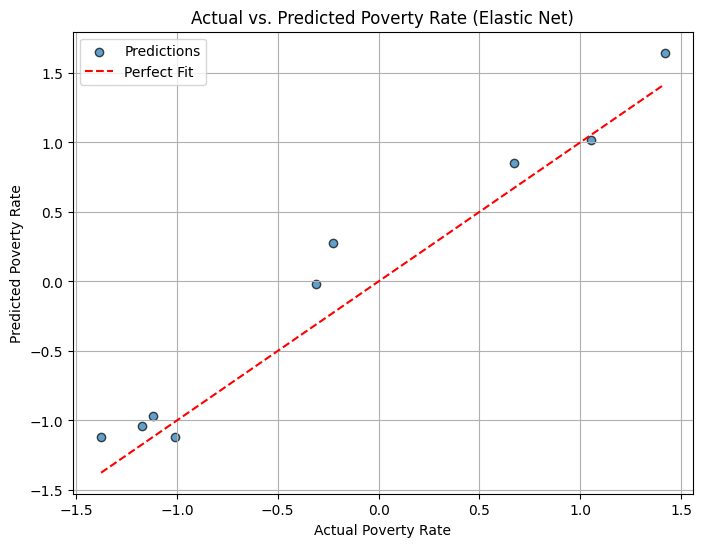

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors="k", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Poverty Rate")
plt.ylabel("Predicted Poverty Rate")
plt.title("Actual vs. Predicted Poverty Rate (Elastic Net)")
plt.legend()
plt.grid(True)
plt.show()
